In [1]:
# Importamos librerias
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

# Limpieza Inicial de los datos

In [2]:
# Leemos la info
df = pd.read_csv('train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
# Iniciamos por averiguar en que columnas tenemos datos nulos para poder analizar que es lo que aremos con ellos. 
# Hay columnas en las que por el tipo de dato podemos cambiar el nulo por un 0 y no nos afectaria en las predicciones, 
#hay otros que si nos pueden afectar. 

# ya que es una funcion que estaremos corriendo constantemente, la guardaremos como tal.

def nulos(data):
    null = df.isnull().sum()
    df_null = pd.DataFrame(null[null>0],columns=['Value'])
    return df_null.sort_values(by='Value',ascending=False)


In [4]:
# Iniciamos con los que tienen una mayor cantidad de nulos. 
# La columna 'PoolQC', nos indica la calidad de la alberca, y la documentacion nos dice que si tiene "NA" es que no tiene alberca. 
# Requerimos transformar los datos para poder evaluarla, por lo que los null los dejamos como '0'

df['PoolQC'] = df.PoolQC.fillna(0)

# Validamos que se hayan transformado correctamente los datos.
df[df['PoolQC']!=0]


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000
810,811,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,...,648,Fa,GdPrv,NaN,0,1,2006,WD,Normal,181000
1170,1171,80,RL,76.0,9880,Pave,NaN,Reg,Lvl,AllPub,...,576,Gd,GdPrv,NaN,0,7,2008,WD,Normal,171000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
1386,1387,60,RL,80.0,16692,Pave,NaN,IR1,Lvl,AllPub,...,519,Fa,MnPrv,TenC,2000,7,2006,WD,Normal,250000
1423,1424,80,RL,NaN,19690,Pave,NaN,IR1,Lvl,AllPub,...,738,Gd,GdPrv,NaN,0,8,2006,WD,Alloca,274970


In [5]:
# La columna 'MiscFeature' nos indica si la casa tiene otros miscelaneos no cubiertos en alguna otra categoria. 
# ya que el NaN significa que no tiene nnguno, podemos aprovechar para sustituirlos por '0'

df['MiscFeature'] = df.MiscFeature.fillna(0)

# Validamos que se hayan transformado correctamente los datos.
df[df['MiscFeature']!=0].head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,0,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,Shed,350,11,2009,WD,Normal,200000


In [6]:
# la columna 'Alley' indica el tipo de camino que se tiene como acceso al domicilio.
# ya que el NaN significa que no tiene nnguno, podemos aprovechar para sustituirlos por '0'

df['Alley'] = df.Alley.fillna(0)

# Validamos que se hayan transformado correctamente los datos.
df[df['Alley']!=0].head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
21,22,45,RM,57.0,7449,Pave,Grvl,Reg,Bnk,AllPub,...,0,0,GdPrv,0,0,6,2007,WD,Normal,139400
30,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,0,MnPrv,0,0,7,2008,WD,Normal,40000


In [7]:
# la columna 'Fence' nos indica la calidad de la cerca. 
# ya que el NaN significa que no tiene nnguno, podemos aprovechar para sustituirlos por '0'

df['Fence'] = df.Fence.fillna(0)

# Validamos que se hayan transformado correctamente los datos.
df[df['Fence']!=0].head(2)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
5,6,50,RL,85.0,14115,Pave,0,IR1,Lvl,AllPub,...,0,0,MnPrv,Shed,700,10,2009,WD,Normal,143000
14,15,20,RL,NaN,10920,Pave,0,IR1,Lvl,AllPub,...,0,0,GdWo,0,0,5,2008,WD,Normal,157000


In [8]:
# la columna 'FireplaceQu' nos indica la calidad de la chimenea.
# ya que el NaN significa que no tiene nnguno, podemos aprovechar para sustituirlos por '0'

df['FireplaceQu'] = df.FireplaceQu.fillna(0)

# Validamos que se hayan transformado correctamente los datos.
df[df['FireplaceQu']!=0].head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,2,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,9,2008,WD,Normal,223500


In [9]:
# La columna 'LotFrontage' nos indica los pies lineales de calle conectados a la casa, podemos intuir que si tiene un valor 
# nulo es que no tiene coneccion a la calle. por lo tanto, podemos pasar a sustituirlos


df['LotFrontage'] = df.LotFrontage.fillna(0)

# Validamos que se hayan transformado correctamente los datos.
df[df['LotFrontage']!=0].head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,5,2007,WD,Normal,181500


In [10]:
# Las siguientes 5 columnas se refieren al garage de la casa: 'GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond'
# podemos ver que en tods tenemos el mismo numero de datos nulos (81 cada una), lo que nos indica que no tiene garage el domicilio. 
# Procedemos a sustituirlos por 0

df['GarageType'] = df.GarageType.fillna(0)
df['GarageYrBlt'] = df.GarageYrBlt.fillna(0)
df['GarageFinish'] = df.GarageFinish.fillna(0)
df['GarageQual'] = df.GarageQual.fillna(0)
df['GarageCond'] = df.GarageCond.fillna(0)

# Validamos que se hayan transformado correctamente los datos.
nulos(df)

,Value
BsmtExposure,38
BsmtFinType2,38
BsmtQual,37
BsmtCond,37
BsmtFinType1,37
MasVnrType,8
MasVnrArea,8
Electrical,1


In [11]:
# de igual manera, las siguientes columnas nos indican si la casa tiene "sotano". el NaN indica que no hay, por lo que
# podemos proceder a sustituirlos por 0
# 'BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtFinType1'

df['BsmtExposure'] = df.BsmtExposure.fillna(0)
df['BsmtFinType2'] = df.BsmtFinType2.fillna(0)
df['BsmtQual'] = df.BsmtQual.fillna(0)
df['BsmtCond'] = df.BsmtCond.fillna(0)
df['BsmtFinType1'] = df.BsmtFinType1.fillna(0)

# Validamos que se hayan transformado correctamente los datos.
nulos(df)

,Value
MasVnrType,8
MasVnrArea,8
Electrical,1


In [12]:
# las siguientes columnas nos indican el tipo de recubrimiento de la mamposteria, si no tiene mamposteria viene como nulo, 
# por lo que podemos proceder a sustituirlo por 0

df['MasVnrType'] = df.MasVnrType.fillna(0)
df['MasVnrArea'] = df.MasVnrArea.fillna(0)

# Validamos que se hayan transformado correctamente los datos.
nulos(df)

,Value
Electrical,1


In [13]:
# en la columna de 'Electrical', indica el tipo de coneccion electrica con la que cuenta, pero como todas las casas deben de tener
# coneccion electrica, podemos intuir que tenemos un fallo en la captura de los datos, por lo que podemos eliminar este dato 
# para que no nos haga ruido. 

df = df.dropna()

In [14]:
# refactorizamos todo el codigo para que quede en una sola celda y mas eficiente:
df[df['Electrical'].isnull()]
df = df.dropna(subset=['Electrical'])
df = df.fillna(0)

# validamos que ya no tengamos nulos
nulos(df)

,Value


In [15]:
# Generamos un CSV de respaldo con esta info
#df.to_csv('Data_no_nulls.csv')

In [16]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,0,Reg,Lvl,AllPub,...,0,0,MnPrv,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,0,Reg,Lvl,AllPub,...,0,0,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,142125


# Analisis de las columnas de manera individual vs el precio

MSSubClass      -0.084230
LotFrontage      0.209692
LotArea          0.263837
OverallQual      0.791069
OverallCond     -0.077924
YearBuilt        0.523273
YearRemodAdd     0.507430
MasVnrArea       0.472606
BsmtFinSF1       0.386436
BsmtFinSF2      -0.011412
BsmtUnfSF        0.214446
TotalBsmtSF      0.613905
1stFlrSF         0.605968
2ndFlrSF         0.319464
LowQualFinSF    -0.025620
GrLivArea        0.708618
BsmtFullBath     0.227082
BsmtHalfBath    -0.016873
FullBath         0.560881
HalfBath         0.284400
BedroomAbvGr     0.168235
KitchenAbvGr    -0.135935
TotRmsAbvGrd     0.533779
Fireplaces       0.466968
GarageYrBlt      0.261413
GarageCars       0.640473
GarageArea       0.623423
WoodDeckSF       0.324422
OpenPorchSF      0.315831
EnclosedPorch   -0.128627
3SsnPorch        0.044571
ScreenPorch      0.111419
PoolArea         0.092397
MiscVal         -0.021200
MoSold           0.046380
YrSold          -0.028907
Name: SalePrice, dtype: float64


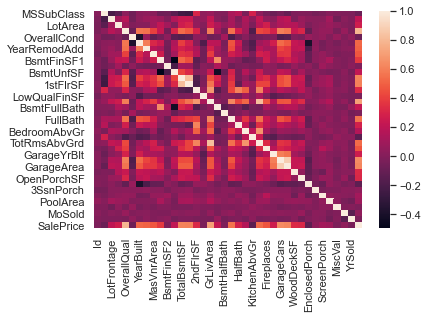

In [17]:
# Primero veamos cual es la correlacion de cada una de las variables vs el precio
tabla_correlacion = df.corr()
# podemos eliminar el ID ya que sabemos que es unicamente el numero de identificacion de cada vivienda y no tiene relacion 
# alguna con los datos.
tabla_correlacion.drop('Id',inplace=True)
# Quitamos el dato de 'SalePrice' ya que tendrá correlacion de 1 consigo mismo
# obtenemos el total de columnas de las cuales podemos tener una correlacion
len(tabla_correlacion['SalePrice'][:-1])
print(tabla_correlacion['SalePrice'][:-1])
sns.heatmap(tabla_correlacion);

In [18]:
# Podemos ver que realmente no podemos sacar nada en este momento y con todos los datos, la matriz de correlacion graficada es 
# imposible de leer. 

In [19]:
# obtenemos que columnas no son numeros
columnas = df.columns
col_objeto = []
for columna in columnas:
    if df[columna].dtypes == object:
        col_objeto.append(columna)

# obtenemos que columnas son numeros
col_numero =[]
for columna in columnas:
    if columna not in col_objeto:
        col_numero.append(columna)

# Vamos a proceder de la siguiente manera:
# dividiremos nuestro DF general en dos partes:
# 1. todos los datos numericos
# 2. todos los datos no numericos. 
# posteriormente procederemos a realizar calculos y transformaciones en cada uno de ellos para ver con que datos podemos obtener 
# una prediccion mas acertada.

In [20]:
# Creamos el df solo con las columnas que tienen datos numericos
df_numericos = df[col_numero]
df_numericos

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [21]:
# Creamos el df sin datos numericos (excepto el precio)
df_no_numericos = df.drop(col_numero[:-1],axis=1)
df_no_numericos

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,RL,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,0,0,0,WD,Normal,208500
1,RL,Pave,0,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,RFn,TA,TA,Y,0,0,0,WD,Normal,181500
2,RL,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,0,0,0,WD,Normal,223500
3,RL,Pave,0,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Unf,TA,TA,Y,0,0,0,WD,Abnorml,140000
4,RL,Pave,0,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,RFn,TA,TA,Y,0,0,0,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,RFn,TA,TA,Y,0,0,0,WD,Normal,175000
1456,RL,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Unf,TA,TA,Y,0,MnPrv,0,WD,Normal,210000
1457,RL,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,RFn,TA,TA,Y,0,GdPrv,Shed,WD,Normal,266500
1458,RL,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Unf,TA,TA,Y,0,0,0,WD,Normal,142125


## Graficas para analisis previo. --> Datos Numericos

In [22]:
df_numericos.head(2)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500


In [ ]:
# para graficar, eliminamos dos columnas: la de Id y la de precio, la primera porque no tiene relacion con los datos y
# la segunda porque no tiene caso graficarla
for columna in df_numericos.columns[1:-1]:
    y=str(columna)
    sns.displot(data=df_numericos,y=y,x='SalePrice')

## Graficas para analisis previo. --> Datos Categoricos

In [23]:
df_no_numericos.head(2)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,RL,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,0,0,0,WD,Normal,208500
1,RL,Pave,0,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,RFn,TA,TA,Y,0,0,0,WD,Normal,181500


In [ ]:
# Para las graficas de datos no numericos, lo que tenemos que hacer es tomar cada una de las columnas y graficarlas 
# contra el precio. 
for columna in df_no_numericos.columns[:-1]:
    y=str(columna)
    sns.catplot(data=df_no_numericos,y=y,x='SalePrice')

In [24]:
# Viendo las graficas, nos podemos dar cuenta del peso que tienen los datos categoricos en el precio de las casas.
# si bien, en este momento no los podemos analizar com tal, podemos ver que caracteristicas pesan mas en el precio de las 
# casas y cuales son los mas comunes. 
# de aqui, podemos inferir cuales son los mas escenciales para el analisis de la prediccion.

# con esto en mente, lo que haremos será consultar el diccionario del df para ver que significa cada uno y ver de 
# que manera los podemos convertir para que nos sea mas util en en analisis.

### Tratamiento de las variables categoricas

In [25]:
# Analizando el diccionario del DataSet, tenemos varias de las columnas categoricas que pueden ser tratadas como 
# dummies, y otras que se pueden modificar los datos para convertirlos en numeros y poder tratarlos sin problemas.

In [26]:
# Primero vemos que hay una columna que (desde mi punto de vista) no nos sirve, por lo que la eliminaremos
df.drop(['MSSubClass','MoSold','YrSold','Id'],axis=1,inplace=True)


In [27]:
# La columna 'YearRemodAdd' indica la fecha en la cual se realizo remodelacion en el domicilio.
# En caso de no haber sido remodelada, mantiene la fecha de construccion por lo que vamos a comvertirla en una variable binaria
# para saber si la casa ah sido remodelada o no, ya que no nos interesa la fecha.
# una vez creada esta columna binaria, eliminaremos la columna original.
df['Remodelacion'] = df.YearRemodAdd == df.YearBuilt
df['Remodelacion'] = df['Remodelacion'].astype('str')
df['Remodelacion'] = df['Remodelacion'].replace({'True':0,'False':1})
df.drop('YearRemodAdd',axis=1,inplace=True)

In [28]:
df.head()

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,Remodelacion
0,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,WD,Normal,208500,0
1,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,WD,Normal,181500,0
2,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,WD,Normal,223500,1
3,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,0,WD,Abnorml,140000,1
4,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,WD,Normal,250000,0


In [29]:
# Tenemos varias columnas con años, por lo que podemos tratarlas para agrupar las casas o su caracteristica por antiguedad
# en lugar de tener como tal la fecha
# Estas dos columnas indican el año en el cual fue construida la casa y el garage, como lo que nos importa es
# el tiempo, vamos a obtener el año actual y restaremos los años correspondientes para tener una cantidad en lugar de fecha.

df['AñosConstCasa'] = 2021 - df['YearBuilt'] 
df['AñosConstGar']= 2021 - df['GarageYrBlt']

# Podemos eliminar las columnas que ya transformarmos
df.drop(['YearBuilt','GarageYrBlt'],axis=1,inplace=True)

# Veamos un poco los datos
"""sns.displot(data=df,x='AñosConstCasa')
sns.displot(data=df,x='AñosConstGar')
"""
# Vemos que en la columna "AñosConstGar" que corresponde a los años de construccion del garage, tenemos unos extremos
# muy raros. Podemos intuir que fue algun error de dedo en la captura, por lo que se procede a eliminarlos convirtiendolos
# en 0.
df['AñosConstGar'] = df['AñosConstGar'].replace({2021:0})

In [30]:
"""sns.displot(data=df,x='AñosConstGar')"""
# Después de haber transformado los datos, podemos ver de una mejor manera la distribucion de los datos.

"sns.displot(data=df,x='AñosConstGar')"

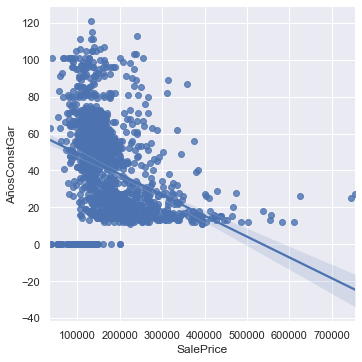

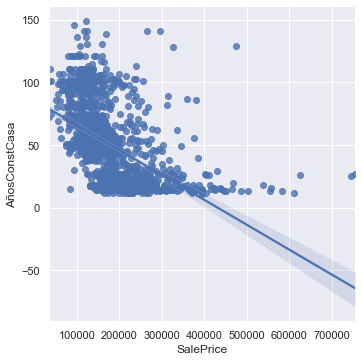

In [31]:
# Analizaremos si los años de construccion de la casa y garage tienen alguna relacion con el precio de venta
sns.lmplot(data=df,x='SalePrice',y='AñosConstGar')
sns.lmplot(data=df,x='SalePrice',y='AñosConstCasa')

In [32]:
# No se puede ver una relacion completamente bien, hasta que hagamos una prueba de hipotesis no sabremos completamente 
# si es que son variable validas o no.

In [33]:
df.head()

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,Remodelacion,AñosConstCasa,AñosConstGar
0,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,WD,Normal,208500,0,18,18.0
1,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,WD,Normal,181500,0,45,45.0
2,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,WD,Normal,223500,1,20,20.0
3,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,WD,Abnorml,140000,1,106,23.0
4,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,WD,Normal,250000,0,21,21.0


### Creacion de Dummies

In [34]:
# varias de las variables categoricas podemos convertirlas en dummies para poder tratarlas
# Viendo el diccionario del Data, es como se llega a estas conclusiones.

dummies = ['MSZoning','Street','Alley','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','CentralAir','Electrical','GarageType','PavedDrive','MiscFeature','SaleType','SaleCondition']

df = pd.get_dummies(data=df,columns=dummies)
df.head()

,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,Reg,AllPub,Gtl,7,5,196.0,Gd,TA,...,0,0,0,1,0,0,0,0,1,0
1,80.0,9600,Reg,AllPub,Gtl,6,8,0.0,TA,TA,...,0,0,0,1,0,0,0,0,1,0
2,68.0,11250,IR1,AllPub,Gtl,7,5,162.0,Gd,TA,...,0,0,0,1,0,0,0,0,1,0
3,60.0,9550,IR1,AllPub,Gtl,7,5,0.0,TA,TA,...,0,0,0,1,1,0,0,0,0,0
4,84.0,14260,IR1,AllPub,Gtl,8,5,350.0,Gd,TA,...,0,0,0,1,0,0,0,0,1,0


### Trabajando con los datos que pueden ser convertidos a variables numericas

In [35]:
# Revisando las descripciones en el diccionario, vemos que para todas estas variables califican alguna de las caracteristicas de la casa
# con lo que nos permite asignarle una calificacion de menor a mayor, dependiendo de cada una de las variables
df['LotShape']=df['LotShape'].replace({'Reg':3,'IR1':2,'IR2':1,'IR3':0})
df['Utilities']=df['Utilities'].replace({'AllPub':4,'NoSewr':'3','NoSeWa':2,'ELO':1})
df['LandSlope']=df['LandSlope'].replace({'Gtl':2,'Mod':1,'Sev':0})
df['ExterQual']=df['ExterQual'].replace({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})
df['ExterCond'] =df['ExterCond'].replace({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})
df['BsmtQual'] = df['BsmtQual'].replace({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})
df['BsmtCond']=df['BsmtCond'].replace({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})
df['BsmtExposure']=df['BsmtExposure'].replace({'Gd':4,'Av':3,'Mn':2,'No':1})
df['BsmtFinType1'] =df['BsmtFinType1'].replace({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1})
df['BsmtFinType2'] =df['BsmtFinType2'].replace({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1})
df['HeatingQC'] =df['HeatingQC'].replace({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})
df['KitchenQual'] =df['KitchenQual'].replace({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})
df['Functional'] = df['Functional'].replace({'Typ':8,'Min1':7,'Min2':6,'Mod':5,'Maj1':4,'Maj2':3,'Sev':2,'Sal':1})
df['FireplaceQu']=df['FireplaceQu'].replace({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})
df['GarageFinish']=df['GarageFinish'].replace({'Fin':3,'RFn':2,'Unf':1,'NA':0})
df['GarageQual']=df['GarageQual'].replace({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})
df['GarageCond']=df['GarageCond'].replace({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})
df['PoolQC']=df['PoolQC'].replace({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})
df['Fence']=df['Fence'].replace({'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1})

df.head()

,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,3,4,2,7,5,196.0,3,2,...,0,0,0,1,0,0,0,0,1,0
1,80.0,9600,3,4,2,6,8,0.0,2,2,...,0,0,0,1,0,0,0,0,1,0
2,68.0,11250,2,4,2,7,5,162.0,3,2,...,0,0,0,1,0,0,0,0,1,0
3,60.0,9550,2,4,2,7,5,0.0,2,2,...,0,0,0,1,1,0,0,0,0,0
4,84.0,14260,2,4,2,8,5,350.0,3,2,...,0,0,0,1,0,0,0,0,1,0


# Analisis

In [36]:
# Tenemos ya nuestro DF listo, sin variables categoricas (convertidas en dummies o con un valor agregado) 
# y con algunas variables mas manipuladas a info que nos pueda servir

In [37]:
# Veamos primero las estadisticas descriptivas de la data
df.describe()
# nuevamente al ser tantos datos no nos da mucha informacion
for i in df.columns:
    df[i].astype('int64')
    
# Debemos de tener todos los datos en numero, por lo que pasaremos todos a 'int64'

In [38]:
# para reducir un poco el numero de columnas, haremos algunas agrupaciones

# Sumaremos el numero total de baños completos
df['TotBaños'] = df['BsmtFullBath']+df['FullBath']

# Sumaremos el numero total de medios baños
df['TotMedBaño']=df['BsmtHalfBath']+df['HalfBath']

# El sotano tiene varias medidas, por lo que trataremos de crear una sola variable que las pueda explicar todas

# vamos a multiplicar la calificion del sotano por la de tamaño correspondiente
df['Bsmt1Cal'] = df['BsmtFinType1']*df['BsmtFinSF1']
df['Bsmt2Cal'] = df['BsmtFinType2']*df['BsmtFinSF2']

# por ultimo, vamos a sacar un promedio de calificacion del sotano, dividiendolo entre el total de tamaño del sotano
df['BsmtCalTot'] = ((df['Bsmt1Cal']+df['Bsmt2Cal']+df['BsmtQual']+df['BsmtCond']+df['BsmtExposure'])/5)/(df['TotalBsmtSF'])

# por ultimo eliminamos las columnas del sotano que ya no requerimos.  --> eliminar datos
col_sotano = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','TotalBsmtSF']
# Eliminamos las columnas que ya no requerimos
df.drop(['BsmtFullBath','FullBath','BsmtHalfBath','HalfBath','TotRmsAbvGrd','BsmtUnfSF','LowQualFinSF','GrLivArea'],axis=1,inplace=True)
df.drop(col_sotano,axis=1,inplace=True)

In [39]:
# Ahora Trabajamos con la de Garage
df['GaragCal'] = ((df['GarageFinish']+df['GarageQual']+df['GarageCond'])/3)/df['GarageArea']

# Eliminamos las columnas que ya no requerimos
df.drop(['GarageFinish','GarageQual','GarageCond','GarageArea'],axis=1,inplace=True)
df.fillna(0)
df.shape

(1459, 212)

In [40]:
# Creamos la calificacion de la cocina
df['KitchCal'] = df['KitchenAbvGr']*df['KitchenQual']

# Creamos la calificacion de Chimenea
df['FireplCal'] = df['Fireplaces']+df['FireplaceQu']

# Creamos la calificacion de la Alberca
df['PoolCal'] = (df['PoolArea']*df['PoolQC'])/2

df['BsmtCalTot'] = df['BsmtCalTot'].replace(np.nan,0)
df['GaragCal']=df['GaragCal'].replace(np.nan,0)
df.drop(['KitchenAbvGr','PoolArea','PoolQC','KitchenQual','Fireplaces','FireplaceQu'],axis=1,inplace=True)

In [41]:
df.shape

(1459, 209)

## Correlacion

In [43]:
# Analizaremos la correlacion de los datos con el precio de venta. 
# siguien siendo muchas columnas, pero podremos analizar cuales son las que tengan una mejor correlacion con el precio y 
# trabajar solamente con ellas.

tabla_correlacion = df.corr()
tabla_correlacion[tabla_correlacion['SalePrice']!=1]['SalePrice'][1:]

LotArea        0.263837
LotShape      -0.267726
Utilities      0.014317
LandSlope     -0.051127
OverallQual    0.791069
                 ...   
BsmtCalTot     0.251313
GaragCal      -0.169859
KitchCal       0.512832
FireplCal      0.527316
PoolCal        0.115831
Name: SalePrice, Length: 207, dtype: float64

In [44]:
# Seguimos teniendo muchas variables, pero haremos un primer analisis realizando una regresion lineal y viendo que tal sale

# Primera Regresion Lineal Inicial

In [45]:
# generamos las variables

y = df['SalePrice']
x1 = df.drop('SalePrice',axis=1)

# Separamos los datos para poder hacer el entrenamiento y la prueba
x_train, x_test, y_train,y_test=train_test_split(x1,y,test_size=.2,random_state=77)

# Agregamos la constante
X = sm.add_constant(x_train)

# Generamos el modelo
linreg_stats = sm.OLS(y_train, X).fit()

linreg_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     62.48
Date:                Tue, 26 Jan 2021   Prob (F-statistic):               0.00
Time:                        04:58:18   Log-Likelihood:                -13377.
No. Observations:                1167   AIC:                         2.711e+04
Df Residuals:                     990   BIC:                         2.800e+04
Df Model:                         176                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
LotFrontage              29.1847     27.314      1.068      0.286     -24.415      82.784
LotArea                   0.5896      0.111      5.299      0.000       0.371       0.808
LotShape               -179.5828   1691.808     -0.106      0.915   -3499.525    3140.360
Utilities             -3.253e+04   6355.430     -5.119      0.000    -4.5e+04   -2.01e+04
LandSlope             -2734.9538   4026.224     -0.679      0.497   -1.06e+04    5165.959
OverallQual            8634.6943   1224.595      7.051      0.000    6231.595     1.1e+04
OverallCond            5347.0268    986.952      5.418      0.000    3410.269    7283.785
MasVnrArea               35.4026      6.940      5.101      0.000      21.784      49.021
ExterQual              5586.9567   2564.574      2.179      0.030     554.331    1.06e+04
ExterCond             -1884.7055   2604.224     -0.724      0.469   -6995.139    3225.728
HeatingQC              2044.9664   1168.856      1.750      0.081    -248.752    4338.685
1stFlrSF                 61.4090      4.768     12.879      0.000      52.052      70.766
2ndFlrSF                 65.7918      6.055     10.866      0.000      53.911      77.673
BedroomAbvGr          -3342.4958   1474.282     -2.267      0.024   -6235.573    -449.419
Functional             5907.1194   1364.361      4.330      0.000    3229.747    8584.492
GarageCars              1.18e+04   2515.735      4.690      0.000    6862.131    1.67e+04
WoodDeckSF               14.3149      7.173      1.996      0.046       0.238      28.392
OpenPorchSF               4.3916     14.138      0.311      0.756     -23.353      32.136
EnclosedPorch            16.2058     15.359      1.055      0.292     -13.934      46.346
3SsnPorch                64.4813     26.570      2.427      0.015      12.342     116.621
ScreenPorch              42.0246     16.327      2.574      0.010       9.985      74.064
Fence                 -1068.4132    745.097     -1.434      0.152   -2530.564     393.737
MiscVal                   5.6372     10.676      0.528      0.598     -15.313      26.588
Remodelacion           3353.4416   1989.756      1.685      0.092    -551.183    7258.066
AñosConstCasa          -319.1784     91.328     -3.495      0.000    -498.398    -139.959
AñosConstGar             19.2098     69.232      0.277      0.781    -116.649     155.069
MSZoning_C (all)      -2.156e+04   1.07e+04     -2.023      0.043   -4.25e+04    -643.541
MSZoning_FV            7534.9749   7041.363      1.070      0.285   -6282.737    2.14e+04
MSZoning_RH           -1207.6911   8136.496     -0.148      0.882   -1.72e+04    1.48e+04
MSZoning_RL            4958.4177   3944.000      1.257      0.209   -2781.142    1.27e+04
MSZoning_RM            2141.4684   4510.414      0.475      0.635   -6709.602     1.1e+04
Street_Grvl           -

a continuacion se muestra el promedio por columna
SP_test         179465.729452
SP_predicted    183651.150068
Diferencia       -4185.420616
dtype: float64


<AxesSubplot:>

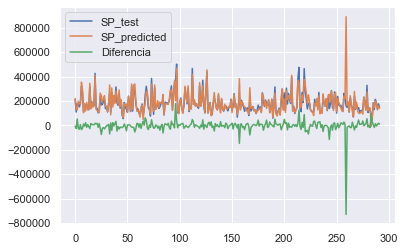

In [46]:
# Obtuvimos una R2 muy cercana a 1, parece buena, sin embargo, tambien puede significar un overfiting.
# Veamos que es lo que se puede hacer con esta prediccion. 
# comparamos los precios de entrenamiento vs los de prediccion
prediccion = linreg_stats.predict(x_test)

predicciones = pd.DataFrame({'SP_test':y_test,'SP_predicted':round(prediccion,2)}).reset_index(drop=True)
predicciones['Diferencia'] = predicciones.SP_test - predicciones.SP_predicted
print('a continuacion se muestra el promedio por columna')
print(predicciones.mean())
predicciones
# esta prueba fue con todos los datos. Veamos si con algunas modificaciones mas podemos mejorar la prediccion 
# y/o usar menos variables

#Graficaremos los precios
predicciones.plot()

# Analisis de Hipotesis

In [47]:
# Vamos a tratar de reducir aun mas el numero de variables que se está utilizando. 
# Para ello tenemos dos hipotesis, las cuales desarrollaremos en este momento, y con los resultados obtenidos
# se correrá nuevamente la regresion lineal y compararemos los resultados obtenidos.

## ¿Son todas las variables nescesarias para poder predecir el precio de venta de una casa?

In [48]:
# H0 = Todas las variables son nescesarias para predecir el valor de una casa
# P_Value = 95%
# Se rechazará esta hipotesis nula si nuestro P_Value resulta menor a 0.05

In [52]:
from scipy.stats import linregress
p_hipotesis_1 = df.copy()

def p_value(data,int_confianza):
      
    y = data['SalePrice']
    p_value = []
    for column in data.columns:
        x = data[column]
        slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
        p_value.append((column,pvalue))
    
    p_value_df = pd.DataFrame(p_value,columns=['Variable','P_Value'])
    
    p_value_df['H0'] = p_value_df['P_Value'] <= int_confianza
            
    p_value_df['H0'] = p_value_df['H0'].astype('str')
    p_value_df['H0'].replace({'True':'Valida para Reg Lin','False':'No Valida Reg Lin'},inplace=True)
    
    return p_value_df

variables_df = p_value(p_hipotesis_1,0.05)
p_value_rl = variables_df[variables_df['H0']=='Valida para Reg Lin']
p_value_rl=p_value_rl.sort_values(by='P_Value',ascending=False).reset_index(drop=True)
p_value_rl

variables_sacar = variables_df[variables_df['H0']=='No Valida Reg Lin']
variables_sacar= variables_sacar['Variable'].to_list()

p_value_rl

,Variable,P_Value,H0
0,Exterior1st_WdShing,4.994873e-02,Valida para Reg Lin
1,MasVnrType_0,4.736618e-02,Valida para Reg Lin
2,Exterior2nd_Plywood,4.303106e-02,Valida para Reg Lin
3,Neighborhood_ClearCr,3.337780e-02,Valida para Reg Lin
4,Neighborhood_Mitchel,2.708229e-02,Valida para Reg Lin
...,...,...,...
117,1stFlrSF,5.771340e-147,Valida para Reg Lin
118,GarageCars,2.942120e-169,Valida para Reg Lin
119,ExterQual,9.348924e-201,Valida para Reg Lin
120,OverallQual,2.732865e-313,Valida para Reg Lin


In [53]:
# En nuestro df inicial teniamos 217 variables, analizando el p_value de cada una contra el 'SalePrice' con
# modelo de regresion lineal, unicamente 127 variables tienen un p_value mayor o igual a nuestro intervalo
# de confianza (0.05), por lo que son las mas reprecentativas para nuestro modelo. 

# por lo tanto, nuestra Hipotesis Nula se descarta y no requerimos de las 217 variables para poder predecir el precio
# de venta de una casa. 
# Esto hace mas manejable nuestra data. 

In [73]:
# vamos a aplicar un modelo de regresion lineal con estos datos y corrobaremos nuestra R2 para ver que tal queda

y2 = df['SalePrice']
x2 = df.drop(variables_sacar,axis=1)

# Separamos los datos para poder hacer el entrenamiento y la prueba
x2_train, x2_test, y2_train,y2_test=train_test_split(x2,y2,test_size=.2,random_state=77)

# Agregamos la constante
X2 = sm.add_constant(x2_train)

# Generamos el modelo
linreg_stats2 = sm.OLS(y2_train, X2).fit()

linreg_stats2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.667e+29
Date:                Tue, 26 Jan 2021   Prob (F-statistic):               0.00
Time:                        05:20:51   Log-Likelihood:                 23161.
No. Observations:                1167   AIC:                        -4.608e+04
Df Residuals:                    1047   BIC:                        -4.547e+04
Df Model:                         119                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.797e-10   4.08e-10     -0.440      0.660   -9.81e-10    6.21e-10
LotFrontage           -2.373e-13   6.38e-13     -0.372      0.710   -1.49e-12    1.01e-12
LotArea                1.722e-15   2.43e-15      0.708      0.479   -3.05e-15    6.49e-15
LotShape              -4.451e-11   3.95e-11     -1.128      0.260   -1.22e-10    3.29e-11
OverallQual            5.542e-12   2.89e-11      0.191      0.848   -5.13e-11    6.23e-11
OverallCond           -2.259e-12   2.22e-11     -0.102      0.919   -4.57e-11    4.12e-11
MasVnrArea             6.506e-14   1.64e-13      0.397      0.691   -2.56e-13    3.87e-13
ExterQual              2.879e-11   5.98e-11      0.481      0.630   -8.86e-11    1.46e-10
HeatingQC              3.436e-11   2.74e-11      1.253      0.211   -1.95e-11    8.82e-11
1stFlrSF              -5.212e-14   1.14e-13     -0.457      0.648   -2.76e-13    1.72e-13
2ndFlrSF              -1.058e-13   1.39e-13     -0.763      0.446   -3.78e-13    1.66e-13
BedroomAbvGr            5.44e-11   3.43e-11      1.587      0.113   -1.28e-11    1.22e-10
Functional             -5.99e-12   3.17e-11     -0.189      0.850   -6.83e-11    5.63e-11
GarageCars             4.314e-11   5.96e-11      0.724      0.469   -7.38e-11     1.6e-10
WoodDeckSF            -1.281e-13   1.72e-13     -0.746      0.456   -4.65e-13    2.09e-13
OpenPorchSF            2.154e-13   3.26e-13      0.662      0.508   -4.23e-13    8.54e-13
EnclosedPorch          5.427e-13   3.58e-13      1.514      0.130   -1.61e-13    1.25e-12
ScreenPorch             2.62e-14   3.81e-13      0.069      0.945   -7.21e-13    7.73e-13
Fence                  3.944e-12   1.74e-11      0.226      0.821   -3.02e-11    3.81e-11
SalePrice                 1.0000   7.03e-16   1.42e+15      0.000       1.000       1.000
AñosConstCasa         -1.569e-12   2.03e-12     -0.772      0.440   -5.55e-12    2.42e-12
AñosConstGar           1.601e-12   1.59e-12      1.006      0.315   -1.52e-12    4.72e-12
MSZoning_C (all)      -1.501e-11    2.6e-10     -0.058      0.954   -5.26e-10    4.96e-10
MSZoning_FV           -1.498e-10   1.85e-10     -0.811      0.418   -5.12e-10    2.13e-10
MSZoning_RH            1.251e-11    2.1e-10      0.060      0.953      -4e-10    4.25e-10
MSZoning_RL           -6.963e-12    1.2e-10     -0.058      0.954   -2.42e-10    2.28e-10
MSZoning_RM           -1.825e-11   1.31e-10     -0.140      0.889   -2.74e-10    2.38e-10
Alley_0               -1.195e-10   1.38e-10     -0.869      0.385   -3.89e-10     1.5e-10
Alley_Grvl            -1.374e-10   1.74e-10     -0.792      0.429   -4.78e-10    2.03e-10
LandContour_Bnk        -4.78e-11   9.81e-11     -0.487      0.626    -2.4e-10    1.45e-10
LandContour_HLS        4.468e-11   1.19e-10      0.375      0.708   -1.89e-10    2.79e-10
LotConfig_CulDSac      

In [74]:
print(len(X2),len(x2_test))
#prediccion2 = linreg_stats2.predict(x2_test)
X2.columns

1167 292


Index(['const', 'LotFrontage', 'LotArea', 'LotShape', 'OverallQual',
       'OverallCond', 'MasVnrArea', 'ExterQual', 'HeatingQC', '1stFlrSF',
       ...
       'SaleCondition_Normal', 'SaleCondition_Partial', 'TotBaños',
       'TotMedBaño', 'Bsmt1Cal', 'BsmtCalTot', 'GaragCal', 'KitchCal',
       'FireplCal', 'PoolCal'],
      dtype='object', length=123)

In [75]:
prediccion2 = linreg_stats2.predict(x2_test)

predicciones2 = pd.DataFrame({'SP_test':y2_test,'SP_predicted':round(prediccion2,2)}).reset_index(drop=True)
predicciones2['Diferencia'] = predicciones2.SP_test - predicciones2.SP_predicted
print('a continuacion se muestra el promedio por columna')
print(predicciones2.mean())
predicciones2

ValueError: shapes (292,122) and (123,) not aligned: 122 (dim 1) != 123 (dim 0)

## ¿Cuales son las variables que mas influyen para que el precio de venta de una casa sea mas elevado?

In [ ]:
# H0 = Solo el 10% de las variables hacen que incremente el precio de venta de una casa
# P_Value = 95%

# Transformacion con PCR

In [ ]:
df_pca = df.copy()

# Prediccion con MSE (Mean Squared Error)

In [ ]:
# Pendiente hacer pruebas de hipotesis -  hacerlo en un jupyter notebook a parte
- casas con alberca
- remodelacion de las casas
- construccion de las casas
- cuales son las casas que mas rapido se venden